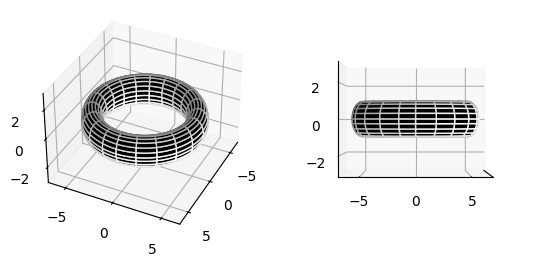

In [33]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def particle_motion(t, y):
    # y = [x, y, z, Vx, Vy, Vz]
    x, y, z, Vx, Vy, Vz = y
    return [Vx, Vy, Vz, 0, 0, 0]  # No acceleration in this example

def torus_event(t, y, XT, YT, ZT, R, r):
    x, y, z, Vx, Vy, Vz = y
    return (np.sqrt((x - XT)**2 + (y - YT)**2) - R)**2 + (z - ZT)**2 - r**2

def torus_normal_vector(R, r, XT, YT, ZT, XI, YI, ZI):
    # Translate the collision point to the torus's local coordinate system
    x_prime = XI - XT
    y_prime = YI - YT
    z_prime = ZI - ZT
    
    # Convert the collision point to toroidal coordinates (theta, phi)
    theta = np.arcsin(z_prime / r)
    phi = np.arctan2(y_prime, x_prime - R)
    
    # Partial derivatives with respect to theta and phi
    dR_dtheta = np.array([-r * np.sin(theta) * np.cos(phi), -r * np.sin(theta) * np.sin(phi), r * np.cos(theta)])
    dR_dphi = np.array([-(R + r * np.cos(theta)) * np.sin(phi), (R + r * np.cos(theta)) * np.cos(phi), 0])
    
    # Normal vector is the cross product of the partial derivatives
    normal_vector = np.cross(dR_dtheta, dR_dphi)
    
    # Normalize the normal vector
    normal_vector = normal_vector / np.linalg.norm(normal_vector)
    return normal_vector

def post_collision_velocity(ImpactVel, normal_vector, damping_factor):
    # Normalize the normal vector
    n = normal_vector / np.linalg.norm(normal_vector)
    
    # Decompose the impact velocity
    v_normal = np.dot(ImpactVel, n) * n
    v_tangential = ImpactVel - v_normal
    
    # Apply the Coefficient of Restitution and damping factor
    v_normal_after = -v_normal * damping_factor
    v_tangential_after = v_tangential * damping_factor
    
    # Calculate the post-collision velocity
    v_after = v_normal_after + v_tangential_after
    return v_after

# Example usage
R = 5  # Major radius
r = 1  # Minor radius
XT, YT, ZT = 0, 0, 0  # Center of the toroid
XI, YI, ZI = 6, 0, 1  # Collision point
VX, VY, VZ = 2, 3, 4  # Velocity before impact
damping_factor = 0.8  # Example damping factor

# Initial conditions
# y0 = [x0, y0, z0, Vx, Vy, Vz]

# # Define the event function with additional arguments
# event = lambda t, y: torus_event(t, y, XT, YT, ZT, R, r)
# event.terminal = True  # Stop the integration when the event is detected
# event.direction = 0  # Detect all zero crossings

# # Solve the ODE system
# sol = solve_ivp(particle_motion, [0, 10], y0, events=event)

# # Check if a collision was detected
# if sol.t_events[0].size > 0:
#     t_collision = sol.t_events[0][0]
#     collision_point = sol.sol(t_collision)
#     print("Collision detected at t =", t_collision)
#     print("Collision point:", collision_point[:3])
    
#     # Calculate the normal vector at the collision point
#     XI, YI, ZI = collision_point[:3]
#     normal_vector = torus_normal_vector(R, r, XT, YT, ZT, XI[0], YI[0], ZI[0])
    
#     # Calculate the post-collision velocity
#     ImpactVel = collision_point[3:]
#     damping_factor = 0.8  # Example damping factor
#     v_after = post_collision_velocity(ImpactVel.flatten(), normal_vector.flatten(), damping_factor)
    
#     # Output the post-collision velocity components
#     VX_prime, VY_prime, VZ_prime = v_after
#     print("Post-collision velocity components:", VX_prime[0], VY_prime[0], VZ_prime[0])
    
# else:
#     print("No collision detected")

# # Visualization of input and output velocity vectors and torus


# # Plot initial velocity vector
# ax.quiver(x0 + Vx*sol.t[-1], y0 + Vy*sol.t[-1], z0 + Vz*sol.t[-1], Vx*sol.t[-1], Vy*sol.t[-1], Vz*sol.t[-1], color='b', label='Initial Velocity')

# # Plot post-collision velocity vector if collision detected
# if sol.t_events[0].size > 0:
#     ax.quiver(XI[0], YI[0], ZI[0], VX_prime[0], VY_prime[0], VZ_prime[0], color='r', label='Post-Collision Velocity')

# Plot torus surface for visualization
theta = np.linspace(0, 2*np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
theta_grid, phi_grid = np.meshgrid(theta, phi)

x_torus = (R + r*np.cos(theta_grid)) * np.cos(phi_grid) + XT
y_torus = (R + r*np.cos(theta_grid)) * np.sin(phi_grid) + YT
z_torus = r * np.sin(theta_grid) + ZT

fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_zlim(-3,3)
ax1.plot_surface(x_torus, y_torus, z_torus, rstride=5, cstride=5, color='k', edgecolors='w')
ax1.view_init(36, 26)
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_zlim(-3,3)
ax2.plot_surface(x_torus, y_torus, z_torus, rstride=5, cstride=5, color='k', edgecolors='w')
ax2.view_init(0, 0)
ax2.set_xticks([])
plt.show()

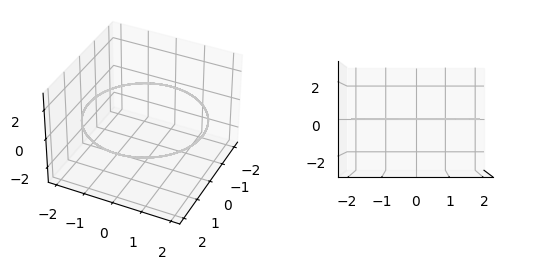

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = 100

theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 2, 0.004
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_zlim(-3,3)
ax1.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='w')
ax1.view_init(36, 26)
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_zlim(-3,3)
ax2.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='w')
ax2.view_init(0, 0)
ax2.set_xticks([])
plt.show()

Post-collision velocity components: 1.6000000000000008 2.4000000000000004 -3.2


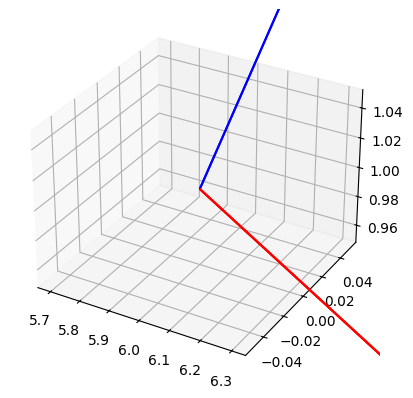

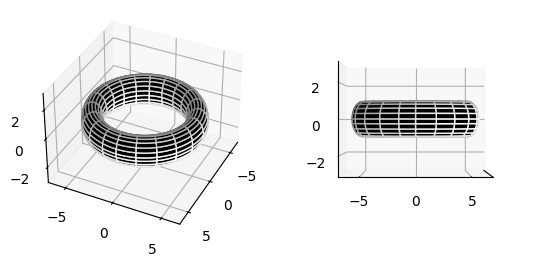

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def toroid_normal_vector(R, r, XT, YT, ZT, XI, YI, ZI):
    # Translate the collision point to the toroid's local coordinate system
    x_prime = XI - XT
    y_prime = YI - YT
    z_prime = ZI - ZT
    
    # Convert the collision point to toroidal coordinates (theta, phi)
    theta = np.arcsin(z_prime / r)
    phi = np.arctan2(y_prime, x_prime - R)
    
    # Partial derivatives with respect to theta and phi
    dR_dtheta = np.array([-r * np.sin(theta) * np.cos(phi), -r * np.sin(theta) * np.sin(phi), r * np.cos(theta)])
    dR_dphi = np.array([-(R + r * np.cos(theta)) * np.sin(phi), (R + r * np.cos(theta)) * np.cos(phi), 0])
    
    # Normal vector is the cross product of the partial derivatives
    normal_vector = np.cross(dR_dtheta, dR_dphi)
    
    # Normalize the normal vector
    normal_vector = normal_vector / np.linalg.norm(normal_vector)
    return normal_vector

def post_collision_velocity(ImpactVel, normal_vector, damping_factor):
    # Normalize the normal vector
    n = normal_vector / np.linalg.norm(normal_vector)
    
    # Decompose the impact velocity
    v_normal = np.dot(ImpactVel, n) * n
    v_tangential = ImpactVel - v_normal
    
    # Apply the Coefficient of Restitution and damping factor
    v_normal_after = -v_normal * damping_factor
    v_tangential_after = v_tangential * damping_factor
    
    # Calculate the post-collision velocity
    v_after = v_normal_after + v_tangential_after
    return v_after

# Example usage
R = 20   # Major radius
r = 1  # Minor radius
XT, YT, ZT = 0, 0, 0  # Center of the toroid
XI, YI, ZI = 6, 0, 1  # Collision point
VX, VY, VZ = 2, 3, 4  # Velocity before impact
damping_factor = 0.8  # Example damping factor

# Calculate the normal vector at the collision point
normal_vector = toroid_normal_vector(R, r, XT, YT, ZT, XI, YI, ZI)

# Calculate the post-collision velocity
ImpactVel = np.array([VX, VY, VZ])
v_after = post_collision_velocity(ImpactVel, normal_vector, damping_factor)

# Output the post-collision velocity components
VX_prime, VY_prime, VZ_prime = v_after
print("Post-collision velocity components:", VX_prime, VY_prime, VZ_prime)

# Visualization of input and output velocity vectors and toroid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot initial velocity vector
ax.quiver(XI, YI, ZI, VX, VY, VZ, color='b', label='Initial Velocity')

# Plot post-collision velocity vector
ax.quiver(XI, YI, ZI, VX_prime, VY_prime, VZ_prime, color='r', label='Post-Collision Velocity')

# Plot toroid surface for visualization
theta = np.linspace(0, 2*np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
theta_grid, phi_grid = np.meshgrid(theta, phi)

x_toroid = (R + r*np.cos(theta_grid)) * np.cos(phi_grid) + XT
y_toroid = (R + r*np.cos(theta_grid)) * np.sin(phi_grid) + YT
z_toroid = r * np.sin(theta_grid) + ZT



fig = plt.figure()

ax1 = fig.add_subplot(121, projection='3d')
ax1.set_zlim(-3,3)
ax.quiver(XI, YI, ZI, VX, VY, VZ, color='b', label='Initial Velocity')
ax.quiver(XI, YI, ZI, VX_prime, VY_prime, VZ_prime, color='r', label='Post-Collision Velocity')
ax1.plot_surface(x_torus, y_torus, z_torus, rstride=5, cstride=5, color='k', edgecolors='w')
ax1.view_init(36, 26)
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_zlim(-3,3)
ax2.plot_surface(x_torus, y_torus, z_torus, rstride=5, cstride=5, color='k', edgecolors='w')
ax2.view_init(0, 0)
ax2.set_xticks([])

# Plot initial velocity vector


# Plot post-collision velocity vector
ax.quiver(XI, YI, ZI, VX_prime, VY_prime, VZ_prime, color='r', label='Post-Collision Velocity')
plt.show()

# Set plot labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
